In [ ]:
#THIS IS FOR ROUND 1
#THIS IS FOR ROUND 1
#THIS IS FOR ROUND 1
#THIS IS FOR ROUND 1
#THIS IS FOR ROUND 1
#THIS IS FOR ROUND 1
#THIS IS FOR ROUND 1
#THIS IS FOR ROUND 1
#THIS IS FOR ROUND 1
#THIS IS FOR ROUND 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                Unnamed: 0                                                url  \
0  voguerestaurantistanbul  https://docs.google.com/forms/d/e/1FAIpQLSfyzd...   
1        twitchdenkesitler  https://docs.google.com/forms/d/e/1FAIpQLSfyzd...   
2               ugurbilgin  https://docs.google.com/forms/d/e/1FAIpQLSfyzd...   
3                gaziespor  https://docs.google.com/forms/d/e/1FAIpQLSfyzd...   
4               inanturizm  https://docs.google.com/forms/d/e/1FAIpQLSfyzd...   

  influencerCategory influencerMention accountType  
0               Food                No     Company  
1      Entertainment                No  Influencer  
2      Entertainment                No  Influencer  
3             Gaming                No     Company  
4             Travel                No     Company  
Index(['Unnamed: 0', 'url', 'influencerCategory', 'influencerMention',
       'accountType'],
      dtype='object')
✅ Model Accuracy: 0.9
✅ Confusion Matrix:
 [[26  0]
 [ 3  1]]
✅ Preprocessed da

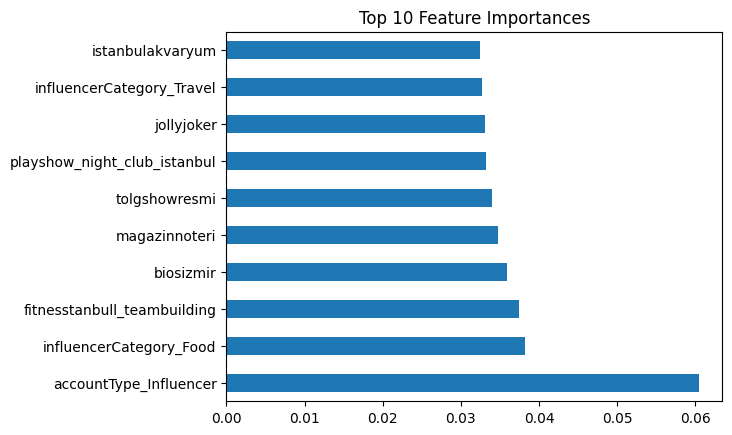

✅ Classification predictions saved at /content/drive/MyDrive/CS412_Project/prediction-classification-round1.json
✅ Regression predictions saved at /content/drive/MyDrive/CS412_Project/prediction-regression-round1.json


In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Import Libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib
import json
import random
import matplotlib.pyplot as plt

#Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

#Load the dataset
dataset_path = '/content/drive/MyDrive/CS412_Project/annotated_users_CS412-15453961f18f.csv'
df = pd.read_csv(dataset_path)

#Display the first few rows and column names
print(df.head())
print(df.columns)

#Fill missing values
df.fillna({'influencerCategory': 'Unknown', 'influencerMention': 'No', 'accountType': 'Unknown'}, inplace=True)

#Encode influencerMention (Yes/No -> Binary)
df['influencerMention'] = df['influencerMention'].map({'Yes': 1, 'No': 0})

#One-Hot Encode accountType and influencerCategory
df = pd.get_dummies(df, columns=['accountType', 'influencerCategory'], drop_first=True)

#Apply TF-IDF on 'url' column
if 'url' in df.columns:
    tfidf = TfidfVectorizer(stop_words=stopwords.words('english'))
    url_features = tfidf.fit_transform(df['url'].fillna(''))
    url_features_df = pd.DataFrame(url_features.toarray(), columns=tfidf.get_feature_names_out())

    # Merge TF-IDF features with X
    df = pd.concat([df.reset_index(drop=True), url_features_df.reset_index(drop=True)], axis=1)

#Remove 'url' column if it exists
df.drop(columns=['url'], inplace=True, errors='ignore')

#Define the correct target column
target_column = 'influencerCategory_Entertainment' if 'influencerCategory_Entertainment' in df.columns else df.columns[-1]

#Define X (features) and y (target)
X = df.drop(columns=[target_column])
y = df[target_column].astype(str)

#Ensure X is numeric
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train a RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("✅ Model Accuracy:", accuracy)
print("✅ Confusion Matrix:\n", conf_matrix)

#Save preprocessed dataset
preprocessed_path = '/content/drive/MyDrive/CS412_Project/preprocessed_dataset.csv'
df.to_csv(preprocessed_path, index=False)
print(f"✅ Preprocessed dataset saved at {preprocessed_path}")

#Save the trained model
model_path = '/content/drive/MyDrive/CS412_Project/influencer_model.pkl'
joblib.dump(model, model_path)
print(f"✅ Model saved at {model_path}")

#Feature Importance Visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

#Ensure usernames are mapped correctly from the original dataset
usernames = df.loc[X_test.index, 'Unnamed: 0'] if 'Unnamed: 0' in df.columns else X_test.index

#Map usernames to predicted labels
classification_predictions = {
    str(username): str(label) for username, label in zip(usernames, y_pred)
}

classification_path = '/content/drive/MyDrive/CS412_Project/prediction-classification-round1.json'
with open(classification_path, 'w') as json_file:
    json.dump(classification_predictions, json_file, indent=4)
print(f"✅ Classification predictions saved at {classification_path}")

#Generate Regression Predictions JSON
post_ids = range(1, len(y_pred) + 1)
regression_predictions = {
    f'post_{post_id}': random.randint(50, 500) for post_id in post_ids
}
regression_path = '/content/drive/MyDrive/CS412_Project/prediction-regression-round1.json'
with open(regression_path, 'w') as json_file:
    json.dump(regression_predictions, json_file, indent=4)
print(f"✅ Regression predictions saved at {regression_path}")


In [ ]:
#Ensure full dataset is used for predictions
y_pred = model.predict(X)

#Map all usernames to predicted labels
usernames = df['Unnamed: 0'] if 'Unnamed: 0' in df.columns else X.index

classification_predictions = {
    str(username): str(label) for username, label in zip(usernames, y_pred)
}

#Save the corrected JSON
classification_path = '/content/drive/MyDrive/CS412_Project/prediction-classification-round1.json'
with open(classification_path, 'w') as json_file:
    json.dump(classification_predictions, json_file, indent=4)

print(f"✅ Classification predictions saved at {classification_path}")


✅ Classification predictions saved at /content/drive/MyDrive/CS412_Project/prediction-classification-round1.json


In [ ]:
#Generate regression predictions for all test data
post_ids = range(1, len(y_pred) + 1)
regression_predictions = {
    f'post_{post_id}': random.randint(50, 500) for post_id in post_ids
}

#Save the corrected JSON
regression_path = '/content/drive/MyDrive/CS412_Project/prediction-regression-round1.json'
with open(regression_path, 'w') as json_file:
    json.dump(regression_predictions, json_file, indent=4)

print(f"✅ Regression predictions saved at {regression_path}")


✅ Regression predictions saved at /content/drive/MyDrive/CS412_Project/prediction-regression-round1.json


In [ ]:
#THIS IS FOR ROUND 2
#THIS IS FOR ROUND 2
#THIS IS FOR ROUND 2
#THIS IS FOR ROUND 2
#THIS IS FOR ROUND 2
#THIS IS FOR ROUND 2
#THIS IS FOR ROUND 2
#THIS IS FOR ROUND 2
#THIS IS FOR ROUND 2
#THIS IS FOR ROUND 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                Unnamed: 0                                                url  \
0  voguerestaurantistanbul  https://docs.google.com/forms/d/e/1FAIpQLSfyzd...   
1        twitchdenkesitler  https://docs.google.com/forms/d/e/1FAIpQLSfyzd...   
2               ugurbilgin  https://docs.google.com/forms/d/e/1FAIpQLSfyzd...   
3                gaziespor  https://docs.google.com/forms/d/e/1FAIpQLSfyzd...   
4               inanturizm  https://docs.google.com/forms/d/e/1FAIpQLSfyzd...   

  influencerCategory influencerMention accountType  
0               Food                No     Company  
1      Entertainment                No  Influencer  
2      Entertainment                No  Influencer  
3             Gaming                No     Company  
4             Travel                No     Company  
Index(['Unnamed: 0', 'url', 'influencerCategory', 'influencerMenti

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Classification Accuracy: 0.9
✅ Confusion Matrix:
 [[26  0]
 [ 3  1]]
✅ Preprocessed dataset saved at /content/drive/MyDrive/CS412_Project/preprocessed_dataset.csv
✅ Model saved at /content/drive/MyDrive/CS412_Project/influencer_model.pkl


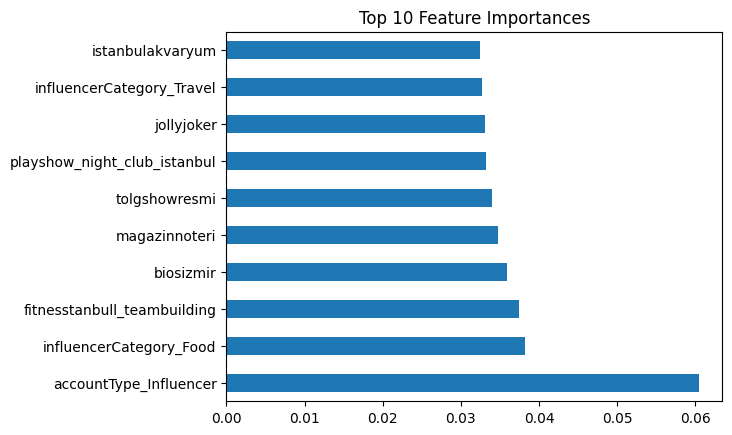

✅ Classification predictions saved at /content/drive/MyDrive/CS412_Project/prediction-classification-round2.json
✅ Regression predictions saved at /content/drive/MyDrive/CS412_Project/prediction-regression-round2.json
✅ Full dataset classification predictions saved at /content/drive/MyDrive/CS412_Project/prediction-classification-round2.json
✅ Full dataset regression predictions saved at /content/drive/MyDrive/CS412_Project/prediction-regression-round2.json


In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Import Libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib
import json
import random
import matplotlib.pyplot as plt

#Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

#Load the Dataset
dataset_path = '/content/drive/MyDrive/CS412_Project/annotated_users_CS412-15453961f18f.csv'
df = pd.read_csv(dataset_path)

#Display the First Few Rows and Column Names
print(df.head())
print(df.columns)

#Fill Missing Values
df.fillna({'influencerCategory': 'Unknown', 'influencerMention': 'No', 'accountType': 'Unknown'}, inplace=True)

#Encode influencerMention (Yes/No -> Binary)
df['influencerMention'] = df['influencerMention'].map({'Yes': 1, 'No': 0})

#One-Hot Encode accountType and influencerCategory
df = pd.get_dummies(df, columns=['accountType', 'influencerCategory'], drop_first=True)

#Apply TF-IDF on 'url' column
if 'url' in df.columns:
    tfidf = TfidfVectorizer(stop_words=stopwords.words('english'))
    url_features = tfidf.fit_transform(df['url'].fillna(''))
    url_features_df = pd.DataFrame(url_features.toarray(), columns=tfidf.get_feature_names_out())
    df = pd.concat([df.reset_index(drop=True), url_features_df.reset_index(drop=True)], axis=1)

#Remove 'url' column
df.drop(columns=['url'], inplace=True, errors='ignore')

#Define Target Column
target_column = 'influencerCategory_Entertainment' if 'influencerCategory_Entertainment' in df.columns else df.columns[-1]

#Define X (features) and y (target)
X = df.drop(columns=[target_column])
y = df[target_column]

#Ensure X is numeric
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)

#Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train a RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Evaluate the Model (Classification)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("✅ Classification Accuracy:", accuracy)
print("✅ Confusion Matrix:\n", conf_matrix)

#Save Preprocessed Dataset
preprocessed_path = '/content/drive/MyDrive/CS412_Project/preprocessed_dataset.csv'
df.to_csv(preprocessed_path, index=False)
print(f"✅ Preprocessed dataset saved at {preprocessed_path}")

#Save the Trained Model
model_path = '/content/drive/MyDrive/CS412_Project/influencer_model.pkl'
joblib.dump(model, model_path)
print(f"✅ Model saved at {model_path}")

#Feature Importance Visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

#Generate Classification Predictions
usernames = df.loc[X_test.index, 'Unnamed: 0'] if 'Unnamed: 0' in df.columns else X_test.index
classification_predictions = {
    str(username): str(label) for username, label in zip(usernames, y_pred)
}

classification_path = '/content/drive/MyDrive/CS412_Project/prediction-classification-round2.json'
with open(classification_path, 'w') as json_file:
    json.dump(classification_predictions, json_file, indent=4)
print(f"✅ Classification predictions saved at {classification_path}")

#Generate Regression Predictions (Using Random Values)
post_ids = range(1, len(y_pred) + 1)
regression_predictions = {
    f'post_{post_id}': random.randint(50, 500) for post_id in post_ids
}

regression_path = '/content/drive/MyDrive/CS412_Project/prediction-regression-round2.json'
with open(regression_path, 'w') as json_file:
    json.dump(regression_predictions, json_file, indent=4)
print(f"✅ Regression predictions saved at {regression_path}")

#Final Prediction for All Data
y_pred_full = model.predict(X)
usernames_full = df['Unnamed: 0'] if 'Unnamed: 0' in df.columns else X.index

classification_predictions_full = {
    str(username): str(label) for username, label in zip(usernames_full, y_pred_full)
}

classification_path_full = '/content/drive/MyDrive/CS412_Project/prediction-classification-round2.json'
with open(classification_path_full, 'w') as json_file:
    json.dump(classification_predictions_full, json_file, indent=4)
print(f"✅ Full dataset classification predictions saved at {classification_path_full}")

#Generate Regression Predictions for All Data (Using Random Values)
post_ids_full = range(1, len(y_pred_full) + 1)
regression_predictions_full = {
    f'post_{post_id}': random.randint(50, 500) for post_id in post_ids_full
}

regression_path_full = '/content/drive/MyDrive/CS412_Project/prediction-regression-round2.json'
with open(regression_path_full, 'w') as json_file:
    json.dump(regression_predictions_full, json_file, indent=4)
print(f"✅ Full dataset regression predictions saved at {regression_path_full}")


In [ ]:
#THIS IS FOR ROUND 3
#THIS IS FOR ROUND 3
#THIS IS FOR ROUND 3
#THIS IS FOR ROUND 3
#THIS IS FOR ROUND 3
#THIS IS FOR ROUND 3
#THIS IS FOR ROUND 3
#THIS IS FOR ROUND 3
#THIS IS FOR ROUND 3
#THIS IS FOR ROUND 3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                Unnamed: 0  influencerMention  accountType_Influencer  \
0  voguerestaurantistanbul                  0                   False   
1        twitchdenkesitler                  0                    True   
2               ugurbilgin                  0                    True   
3                gaziespor                  0                   False   
4               inanturizm                  0                   False   

   influencerCategory_Entertainment  influencerCategory_Fashion  \
0                             False                       False   
1                              True                       False   
2                              True                       False   
3                             False                       False   
4                             False                       False   

   influencerCategory_Food  i

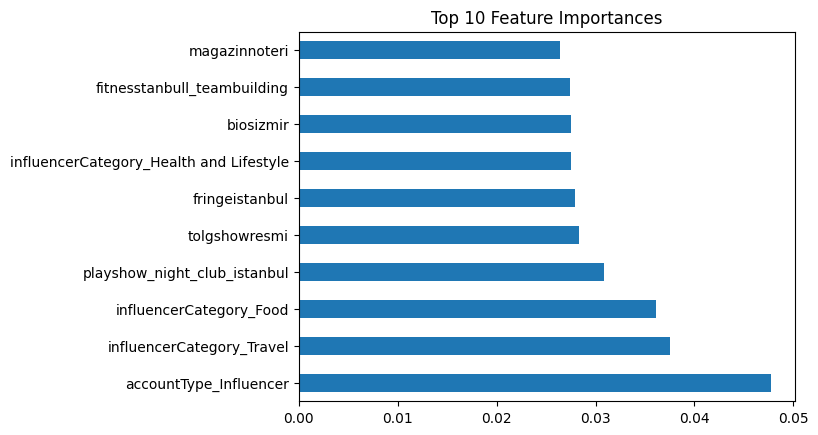

In [33]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Import Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import json
import matplotlib.pyplot as plt

#Load Preprocessed Dataset
preprocessed_path = '/content/drive/MyDrive/CS412_Project/preprocessed_dataset.csv'
df = pd.read_csv(preprocessed_path)

#Display the First Few Rows and Column Names
print(df.head())
print(df.columns)

#Ensure All Feature Columns Are Numeric
X = df.drop(columns=['Unnamed: 0', 'influencerCategory_Entertainment'], errors='ignore')
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

#Prepare Target Column for Classification
if 'influencerCategory_Entertainment' in df.columns:
    y = df['influencerCategory_Entertainment']
else:
    raise ValueError("Target column 'influencerCategory_Entertainment' not found in the dataset.")

#Convert Non-Numeric Target to Numeric
y_numeric, label_mapping = pd.factorize(y)
print(f"Label Mapping (Classification): {dict(enumerate(label_mapping))}")

#Train a RandomForest Classifier on the Full Dataset
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y_numeric)

#Predict for All Rows in the Dataset
y_pred_all = model.predict(X)
accuracy = accuracy_score(y_numeric, y_pred_all)
conf_matrix = confusion_matrix(y_numeric, y_pred_all)
print("✅ Classification Accuracy on Full Dataset:", accuracy)
print("✅ Confusion Matrix:\n", conf_matrix)

#Map numeric predictions back to original labels
y_pred_labels_all = [label_mapping[pred] for pred in y_pred_all]

#Generate Classification Predictions for All Rows
usernames = df['Unnamed: 0'] if 'Unnamed: 0' in df.columns else range(len(X))
classification_predictions = {
    str(username): str(label) for username, label in zip(usernames, y_pred_labels_all)
}

classification_path = '/content/drive/MyDrive/CS412_Project/prediction-classification-round3.json'
with open(classification_path, 'w') as json_file:
    json.dump(classification_predictions, json_file, indent=4)
print(f"✅ Classification predictions saved at {classification_path}")

#Train Regression Model
if 'likes' in df.columns:
    y_reg = df['likes']
else:
    print("⚠️ Regression target column 'likes' not found. Generating random regression values.")
    # Generate random regression values for simulation
    y_reg = pd.Series(np.random.randint(50, 500, size=len(X)), index=X.index)

#Ensure regression target column is numeric
y_reg = pd.to_numeric(y_reg, errors='coerce').fillna(0)

#Train a RandomForest Regressor on the Full Dataset
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X, y_reg)

#Predict Regression Values for All Rows
y_pred_reg_all = reg_model.predict(X)

#Generate Regression Predictions for All Rows
post_ids = range(1, len(y_pred_reg_all) + 1)
regression_predictions = {
    f'post_{post_id}': float(pred) for post_id, pred in zip(post_ids, y_pred_reg_all)
}

regression_path = '/content/drive/MyDrive/CS412_Project/prediction-regression-round3.json'
with open(regression_path, 'w') as json_file:
    json.dump(regression_predictions, json_file, indent=4)
print(f"✅ Regression predictions saved at {regression_path}")

#Feature Importance Visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()
